# <b><span style='color:#F1A424'>AutoML - Regression - Advertisment Sales Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset Used : Advertising Sales Dataset**

**Features**:

- `TV`: Advertising done on TV.
- `Radio`: Advertising done on Radio.
- `Newspapaer`: Advertising done on Newspaper.

**Target Variable**:

- `Sales`: The Sales received after advertisement.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict sales received based on advertisement.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','advertising')

In [5]:
# Fetching in teradata dataframe
advertising_df = DataFrame("advertising")

In [6]:
# first 5 rows
advertising_df.head()

TV,radio,newspaper,sales
5.4,29.9,9.4,5.3
7.8,38.9,50.6,6.6
8.4,27.2,2.1,5.7
8.6,2.1,1.0,4.8
11.7,36.9,45.2,7.3
13.1,0.4,25.6,5.3
8.7,48.9,75.0,7.2
7.3,28.1,41.4,5.5
4.1,11.6,5.7,3.2
0.7,39.6,8.7,1.6


In [7]:
# advertising_df dataset
advertising_df.shape

(200, 4)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
advertising_df_sample = advertising_df.sample(frac = [0.8, 0.2])

In [9]:
advertising_df_sample.head()

TV,radio,newspaper,sales,sampleid
5.4,29.9,9.4,5.3,1
7.8,38.9,50.6,6.6,1
8.4,27.2,2.1,5.7,1
8.6,2.1,1.0,4.8,1
11.7,36.9,45.2,7.3,1
13.1,0.4,25.6,5.3,1
8.7,48.9,75.0,7.2,1
7.3,28.1,41.4,5.5,2
4.1,11.6,5.7,3.2,1
0.7,39.6,8.7,1.6,1


In [10]:
# Fetching train and test data
advertising_df_train= advertising_df_sample[advertising_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
advertising_df_test = advertising_df_sample[advertising_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
advertising_df_train.shape

(160, 4)

In [12]:
# test data shape
advertising_df_test.shape

(40, 4)

In [13]:
#train dataset
advertising_df_train.head()

TV,radio,newspaper,sales
5.4,29.9,9.4,5.3
8.4,27.2,2.1,5.7
8.6,2.1,1.0,4.8
8.7,48.9,75.0,7.2
13.1,0.4,25.6,5.3
13.2,15.9,49.6,5.6
11.7,36.9,45.2,7.3
7.8,38.9,50.6,6.6
4.1,11.6,5.7,3.2
0.7,39.6,8.7,1.6


In [14]:
# test dataset
advertising_df_test.head()

TV,radio,newspaper,sales
23.8,35.1,65.9,9.2
25.6,39.0,9.3,9.5
28.6,1.5,33.0,7.3
43.1,26.7,35.1,10.1
68.4,44.5,35.6,13.6
74.7,49.4,45.7,14.7
48.3,47.0,8.5,11.6
25.1,25.7,43.3,8.5
17.2,45.9,69.3,12.0
7.3,28.1,41.4,5.5


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 500 sec and max_models to 6
# and verbose level 2 for detailed loggging

aml = AutoRegressor(max_runtime_secs=500,
                    max_models=6,
                    verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 160
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
sales,FLOAT,160,0,None,0,160,0,0.0,100.0
TV,FLOAT,160,0,None,0,160,0,0.0,100.0
newspaper,FLOAT,160,0,None,0,160,0,0.0,100.0
radio,FLOAT,160,0,None,1,159,0,0.0,100.0



Statistics of Data:


func,TV,radio,newspaper,sales
std,87.014,15.136,21.848,5.499
25%,72.7,9.3,14.65,10.975
50%,163.4,21.2,26.5,16.25
75%,220.35,36.9,46.05,19.1
max,296.4,49.6,114,27
min,0.7,0,0.9,1.6
mean,149.596,22.878,31.652,15.23
count,160,160,160,160



Target Column Distribution:


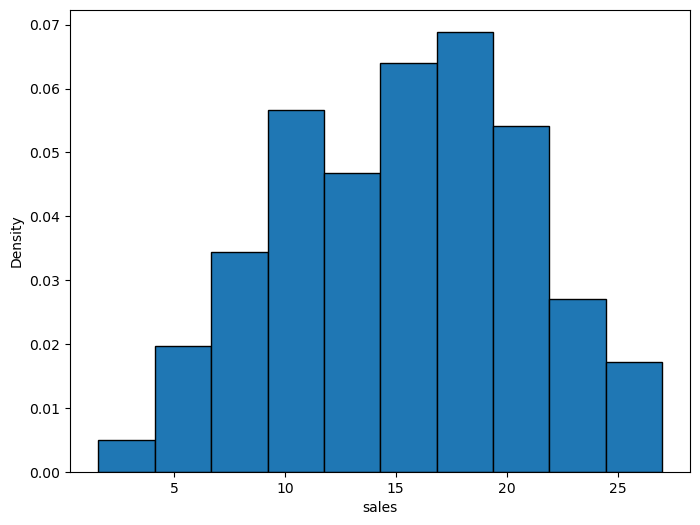

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0  newspaper               1.25


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Training size : 0.8                                                                      
Testing size  : 0.2                                                                      


TV,radio,newspaper,sales,id
137.9,46.4,59.0,15.0,10
149.7,35.6,6.0,17.3,12
8.4,27.2,2.1,5.7,20
220.3,49.0,3.2,24.7,9
239.9,41.5,18.5,23.2,13
227.2,15.8,49.9,19.8,21
18.8,21.7,50.4,7.0,11
276.7,2.3,23.7,16.8,19
38.2,3.7,13.8,7.6,14
165.6,10.0,17.6,17.6,22


TV,radio,newspaper,sales,id
39.5,41.1,5.8,10.8,26
261.3,42.7,54.7,24.2,30
206.8,5.2,19.4,17.2,126
13.2,15.9,49.6,5.6,24
110.7,40.6,63.2,16.0,127
139.2,14.3,25.6,12.2,27
44.5,39.3,45.1,10.4,115
8.6,2.1,1.0,4.8,29
283.6,42.0,66.2,25.5,125
229.5,32.3,74.2,19.7,25


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0  newspaper               1.25


['newspaper']
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259323205894"' - 7/19


TV,radio,newspaper,sales,id
149.7,35.6,6.0,17.3,12
187.9,17.2,17.9,19.7,8
93.9,43.5,50.5,15.3,16
239.9,41.5,18.5,23.2,13
137.9,46.4,59.0,15.0,10
210.7,29.5,9.3,18.4,18
18.8,21.7,50.4,7.0,11
276.7,2.3,23.7,16.8,19
220.3,49.0,3.2,24.7,9
5.4,29.9,9.4,5.3,17


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719257897161040"' - 8/19
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258059000748"'


['TV', 'radio', 'newspaper']


['TV', 'radio', 'newspaper']


sales,id,TV,radio,newspaper
15.0,10,-0.1447805004573944,1.5813074813697783,1.4557133488208975
17.3,12,-0.007567568228905058,0.8626609794668315,-1.1844967933371555
23.2,13,1.0412973882973457,1.2552549018027006,-0.5618057220734638
7.6,14,-1.3041134956421747,-1.2600078548576135,-0.7959375648686119
15.3,16,-0.6564219426653215,1.3883375873402832,1.0322834203615872
5.3,17,-1.6855189343789931,0.4833753256847205,-1.0151248219534315
17.2,15,0.7924535959507629,-1.1468875721506682,-0.11844967933371534
7.0,11,-1.5297008587974879,-0.06226368501936867,1.0273018917914774
24.7,9,0.8133843822229055,1.7543149725686358,-1.3239795933002225
19.7,8,0.436630229324341,-0.36169972747892987,-0.5916948934941211


sales,id,TV,radio,newspaper
6.7,158,-1.5308636802570517,-0.7010605755997659,-0.3177108221380967
15.6,205,0.575005983012394,-1.3332033319032837,-0.42730445068050643
19.4,194,0.783151024274255,0.7229241596523696,1.4557133488208975
14.8,28,0.30988269023192255,-0.8873763353523816,-1.1645706790567174
10.8,26,-1.2889968166678496,1.2286383646951842,-1.1944598504773745
10.1,123,-0.0064047467693413235,-1.4197070775027125,-0.2728770650071108
5.6,24,-1.5948188605330427,-0.44820347307835856,0.9874496632306013
17.0,122,1.3087463239969437,-1.2733161234113717,-0.5119904363723684
13.4,156,-0.12850100002350576,-0.5413613529546665,-0.9752725933925551
11.0,131,-0.24362032452028942,-1.1269251693200306,0.07582993490055659


['TV', 'radio']


['r_TV', 'r_radio']


sales,id,r_TV,r_radio
15.0,10,-0.1447805004573944,1.5813074813697783
17.3,12,-0.007567568228905058,0.8626609794668315
23.2,13,1.0412973882973457,1.2552549018027006
7.6,14,-1.3041134956421747,-1.2600078548576135
15.3,16,-0.6564219426653215,1.3883375873402832
5.3,17,-1.6855189343789931,0.4833753256847205
17.2,15,0.7924535959507629,-1.1468875721506682
7.0,11,-1.5297008587974879,-0.06226368501936867
24.7,9,0.8133843822229055,1.7543149725686358
19.7,8,0.436630229324341,-0.36169972747892987


sales,id,r_TV,r_radio
6.7,158,-1.5308636802570517,-0.7010605755997659
15.6,205,0.575005983012394,-1.3332033319032837
19.4,194,0.783151024274255,0.7229241596523696
14.8,28,0.30988269023192255,-0.8873763353523816
10.8,26,-1.2889968166678496,1.2286383646951842
10.1,123,-0.0064047467693413235,-1.4197070775027125
5.6,24,-1.5948188605330427,-0.44820347307835856
17.0,122,1.3087463239969437,-1.2733161234113717
13.4,156,-0.12850100002350576,-0.5413613529546665
11.0,131,-0.24362032452028942,-1.1269251693200306


['TV', 'radio', 'newspaper']


sales,id,TV,radio,newspaper
15.0,10,-0.14478050045739474,1.5813074813697778,1.455713348820897
17.3,12,-0.007567568228905389,0.8626609794668312,-1.184496793337156
5.7,20,-1.6506342905920892,0.3037137002089834,-1.3787764075714277
7.6,14,-1.3041134956421752,-1.260007854857614,-0.7959375648686122
23.2,13,1.0412973882973453,1.2552549018027002,-0.5618057220734641
19.8,21,0.8936190629327844,-0.4548576073552382,1.0023942489409294
24.7,9,0.8133843822229052,1.7543149725686356,-1.323979593300223
5.3,17,-1.6855189343789934,0.48337532568472014,-1.015124821953432
17.2,15,0.7924535959507626,-1.1468875721506686,-0.1184496793337157
21.5,23,0.9029216346092923,1.0023977992812931,0.11070063489132294


sales,id,TV,radio,newspaper
5.6,24,-1.594818860533043,-0.44820347307835906,0.987449663230601
17.0,122,1.3087463239969432,-1.2733161234113721,-0.5119904363723689
4.8,29,-1.6483086476729625,-1.36647400328768,-1.4335732218426325
25.5,125,1.5494503661265824,1.288525573187096,1.8143834058687838
10.4,115,-1.2308557436896765,1.108863947711359,0.763280877575672
24.2,30,1.2901411806439282,1.3351045131252501,1.2415076203061872
17.2,126,0.6564034851818367,-1.1601958407044268,-0.5169719649424784
14.8,28,0.3098826902319223,-0.8873763353523821,-1.1645706790567179
12.9,124,-0.21687543095033013,-0.2818501161563808,0.2402203777141709
16.9,31,0.15057615027172688,0.5964956083916657,1.1518401060442154


['col_0', 'col_1', 'col_2']


response_column : sales                                                                                                                               
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
num_trees : (-1, 10, 20)
seed : 42
Total number of models for decision_forest : 48
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : sales
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 768
-------------------------------------------------------------------------------------------------------------------------------------------------

result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258189242751"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258067033005"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258429619242"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258716000900"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258217515013"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258446303623"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259233540674"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259062737615"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258841761982"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258904323063"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258403236293"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258500532932"'


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259087996092"'                                                                                                                      
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719258376801097"'
result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719266755080618"'


,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_1,rfe,0.920625,1.786890,0.010297,1.336746,0.101475,0.939795,0.935643
1,2,GLM_1,rfe,1.344935,3.292778,0.020201,1.814601,0.142130,0.889058,0.881407
2,3,XGBOOST_1,rfe,1.622821,3.309030,0.015430,1.819074,0.124219,0.888510,0.880821
3,4,GLM_2,pca,1.479534,4.181279,0.016710,2.044818,0.129267,0.859122,0.844028
4,5,DECISIONFOREST_1,rfe,1.976406,5.795498,0.035381,2.407384,0.188097,0.804735,0.791268
5,6,XGBOOST_2,pca,1.898949,6.342013,0.036450,2.518335,0.190920,0.786321,0.763427


In [17]:
# Fitting train data
aml.fit(advertising_df_train, advertising_df_train.sales)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_1,rfe,0.920625,1.786890,0.010297,1.336746,0.101475,0.939795,0.935643
1,2,GLM_1,rfe,1.344935,3.292778,0.020201,1.814601,0.142130,0.889058,0.881407
2,3,XGBOOST_1,rfe,1.622821,3.309030,0.015430,1.819074,0.124219,0.888510,0.880821
3,4,GLM_2,pca,1.479534,4.181279,0.016710,2.044818,0.129267,0.859122,0.844028
4,5,DECISIONFOREST_1,rfe,1.976406,5.795498,0.035381,2.407384,0.188097,0.804735,0.791268
5,6,XGBOOST_2,pca,1.898949,6.342013,0.036450,2.518335,0.190920,0.786321,0.763427


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Model-ID,Feature-Selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,KNN_1,rfe,0.920625,1.78689,0.010297,1.336746,0.101475,0.939795,0.935643


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(advertising_df_test)

Data Transformation started ...


result data stored in table '"ALICE"."ml__td_sqlmr_persist_out__1719259851940465"'⫾⫾⫾｜ 60% - 6/10


id,TV,radio,newspaper,sales
17,89.7,9.9,35.7,10.6
26,95.7,1.4,7.4,11.9
20,175.1,22.5,31.5,16.1
50,107.4,14.0,10.9,11.5
28,74.7,49.4,45.7,14.7
15,94.2,4.9,8.1,14.0
32,102.7,29.6,8.4,14.0
19,48.3,47.0,8.5,11.6
53,293.6,27.7,1.8,20.7
38,237.4,5.1,23.5,17.5


sales,id,TV,radio,newspaper
17.5,38,1.0122268518082589,-1.1668499749813053,-0.31272929356798707
9.2,36,-1.4715597858193146,0.8293903080824359,1.7994388201584555
14.7,28,-0.8796836629015079,1.7809315096761522,0.7931700489963296
11.5,50,-0.49944104562425296,-0.5746320243390622,-0.9404018934017885
16.1,20,0.28778908250021656,-0.009030610804335527,0.08579299204077562
14.0,15,-0.6529334782866312,-1.1801582435350637,-1.0798846933648552
14.0,32,-0.5540936542237361,0.4634129228540833,-1.0649401076545268
11.6,19,-1.1866685282262643,1.6212322870310532,-1.0599585790844173
20.7,53,1.6657325120829296,0.3369843715933796,-1.3937209932817558
11.8,40,-0.8599156980889289,0.2704430288245882,-0.37250763640930146


id,TV,radio,sales
50,107.4,14.0,11.5
28,74.7,49.4,14.7
15,94.2,4.9,14.0
32,102.7,29.6,14.0
34,134.3,4.9,14.0
26,95.7,1.4,11.9
20,175.1,22.5,16.1
40,76.4,26.7,11.8
22,184.9,21.0,20.5
19,48.3,47.0,11.6


sales,id,r_TV,r_radio
10.6,17,-0.7052604439669873,-0.8474515296911068
9.2,36,-1.4715597858193146,0.8293903080824359
14.7,28,-0.8796836629015079,1.7809315096761522
14.0,15,-0.6529334782866312,-1.1801582435350637
17.5,38,1.0122268518082589,-1.1668499749813053
10.7,55,-0.5808385477936959,-0.8674139325217443
11.8,40,-0.8599156980889289,0.2704430288245882
20.5,22,0.40174558553743683,-0.10884262495752259
11.5,50,-0.49944104562425296,-0.5746320243390622
11.6,19,-1.1866685282262643,1.6212322870310532


sales,id,TV,radio,newspaper
10.6,17,-0.7052604439669876,-0.8474515296911074,0.29501719198537585
14.0,15,-0.6529334782866315,-1.1801582435350644,-1.0798846933648556
14.0,32,-0.5540936542237365,0.4634129228540829,-1.064940107654527
11.6,19,-1.1866685282262646,1.621232287031053,-1.0599585790844175
17.5,38,1.0122268518082587,-1.166849974981306,-0.31272929356798745
10.7,55,-0.5808385477936963,-0.8674139325217448,-1.3040534790197846
11.5,50,-0.4994410456242533,-0.5746320243390627,-0.9404018934017888
11.8,40,-0.8599156980889292,0.27044302882458776,-0.3725076364093018
20.5,22,0.4017455855374365,-0.10884262495752307,-0.38745222211963043
9.2,36,-1.471559785819315,0.8293903080824355,1.7994388201584552


,id,col_0,col_1,col_2,sales
0,26,-1.888529,0.193355,0.198287,11.9
1,17,-0.551606,0.615668,0.786946,10.6
2,40,-0.275228,0.802607,-0.481070,11.8
3,19,0.106570,1.187099,-1.933786,11.6
4,38,-0.774242,-1.214602,0.639713,17.5
5,50,-1.159035,0.218808,-0.269739,11.5
6,36,1.448029,1.896165,0.631764,9.2
7,15,-1.708448,0.251403,0.057004,14.0
8,20,0.121653,-0.264040,0.075815,16.1
9,34,-1.555441,-0.189478,0.113697,14.0


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being used for generating prediction :
Model ID : KNN_1 
Feature Selection Method : rfe

Prediction : 
   id  prediction  sales
0  12   18.197614   17.1
1  10   21.796484   22.2
2  15   12.431960   14.0
3  14   19.602881   19.8
4  22   19.724658   20.5
5  27   13.714239   13.2
6   9    7.619378    9.5
7  11   20.198037   17.4
8  50   12.161001   11.5
9  28   13.760772   14.7

Performance Metrics : 
        MAE       MSE      MSLE      MAPE       MPE      RMSE     RMSLE        ME        R2        EV       MPD      MGD
0  1.020926  1.957473  0.011834  7.791038  1.001597  1.399097  0.108784  4.596665  0.894172  0.895531  0.164324  0.01545


In [23]:
# Printing prediction
prediction.head()

id,prediction,sales
10,21.796484307339313,22.2
12,18.197613646770282,17.1
13,13.838660703735231,13.6
14,19.602881018346427,19.8
16,11.405373789687497,12.3
17,11.422691041443578,10.6
15,12.43195967604578,14.0
11,20.19803720471646,17.4
9,7.619378109969068,9.5
8,9.528899334908152,10.1


In [24]:
remove_context()

True